<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 145.0 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-43ymnn8x
  Entered build tracker: /tmp/pip-build-tracker-43ymnn8x
  Created temporary directory: /tmp/pip-install-ajqqal2d
  Created temporary directory: /tmp/pip-ephem-wheel-cache-l4sdn0ob
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Star

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.3 MB/s eta 0:00:00


In [7]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [8]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [9]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-9.87, -8.43, -6.52, -4.21, -1.53, 0.54, 1.29, 2.05, 2.76, 3.47, 4.18, 4.89, 5.6, 6.31, 7.02, 7.73, 8.44, 9.15, 9.86]


In [10]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [11]:
# def sphere(x):
#     return sum(x**2)

In [12]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [14]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [15]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [16]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [17]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [18]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [19]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [20]:
costs = []
errors = []

In [21]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [22]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


<ipython-input-13-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-10-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4317.89999788 -4317.89999791 -4317.89999791 -4317.89999799
 -4317.89999807 -4317.8999981  -4317.89999847 -4317.89999847
 -4317.89999847 -4317.89999864 -4317.89999874 -4317.89999874
 -4317.89999894 -4317.89999894 -4317.89999894 -4317.89999897
 -4317.89999921 -4317.89999925 -4317.89999932 -4317.89999934
 -4317.89999955 -4317.89999955 -4317.89999956 -4317.89999964
 -4317.89999964 -4317.89999964 -4317.89999966 -4317.89999967
 -4317.89999971 -4317.89999971 -4317.89999971 -4317.89999971
 -4317.89999973 -4317.89999975 -4317.89999976 -4317.89999977
 -4317.89999979 -4317.89999979 -4317.89999979 -4317.89999982
 -4317.89999982 -4317.89999982 -4317.89999986 -4317.89999989
 -4317.89999989 -4317.89999989 -4317.89999989 -4317.8999999
 -4317.8999999  -4317.89999991 -4317.89999991 -4317.89999992
 -4317.89999992 -4317.89999993 -4317.89999993 -4317.89999993
 -4317.89999993 -4317.89999994 -4317.89999994 -4317.89999994
 -4317.89999994 -4317.89999995 -431

In [23]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

2.830802259268239e-10
0.30184657799964043
5.511776794264733e-05
7.619235020683846e-08
1.1558210013003531
1.4768598665860395
22642.323588111572
0.0001495449025696871
1265.244900289304
9639.519568941007
2122.1193421371995
8542.537719825243
1574.935279262957
17528.37491896769
5.818072375833339
682.1000000000158
682.1002399203135
26550.473575491138
16006.646666292114
10.642854080360237
5.998916495129976
74068.64187135384
44.04499581313727
152.58129583584005





Problem 1 Best Cost: [62881.97453231 53087.73180534 42245.88691954 34408.58021419
 28038.25261045 18643.46358262 14236.21573998 14236.21573998
 12337.20620921 11132.96156738  5785.36294073  4690.17878599
  4472.31622304  3830.49774006  2506.5584906   1873.94102219
  1013.36833802   932.87879473   668.96195286   -93.29766602
   -93.29766602  -258.40753054  -258.40753054  -420.52557627
  -420.52557627  -420.52557627  -550.39399834  -559.24127939
  -559.24127939  -630.60289173  -741.4479925   -741.4479925
  -741.4479925   -796.45014126  -796.45014126  -796.45014126
  -812.12374035  -836.63177342  -864.85921106  -864.85921106
  -914.27453591  -914.27453591  -914.27453591  -916.56226425
  -957.39562184  -957.39562184  -960.73039527  -980.68802815
  -984.50604833  -984.50604833  -987.09688834  -992.88755363
 -1011.54007153 -1011.54007153 -1015.94679714 -1015.94679714
 -1018.90555901 -1033.81771393 -1045.81722061 -1045.81722061
 -1045.81722061 -1046.39872537 -1046.39872537 -1046.48023446
 

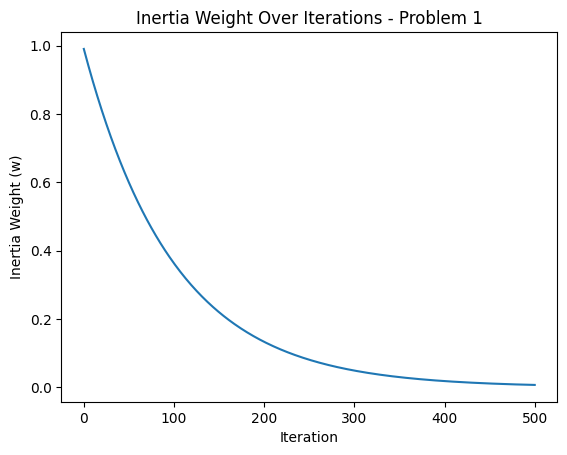

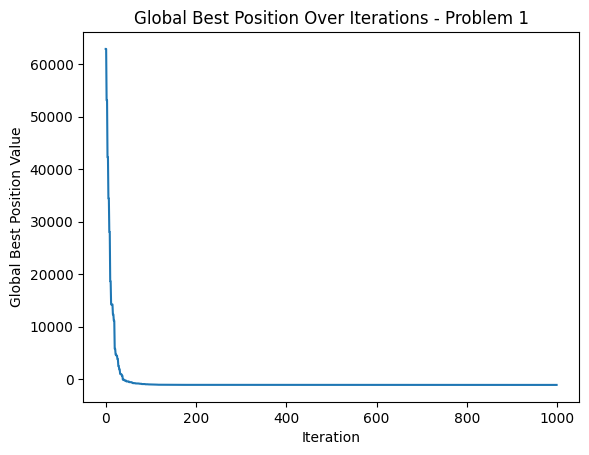




Problem 2 Best Cost: [-701.39611996 -701.4105441  -701.42491843 -701.44743155 -701.47038886
 -701.48132193 -701.50166077 -701.52333817 -701.52356419 -701.55840869
 -701.55840869 -701.57011518 -701.58178931 -701.60633106 -701.63723916
 -701.65167812 -701.66419864 -701.69264537 -701.69264537 -701.69264537
 -701.70498191 -701.73954236 -701.73954236 -701.74096579 -701.74096579
 -701.74510181 -701.74510181 -701.75021318 -701.75195241 -701.75836156
 -701.75836156 -701.76051973 -701.76394092 -701.76394092 -701.77867945
 -701.77867945 -701.79926434 -701.79926434 -701.79926434 -701.79926434
 -701.80942088 -701.81127017 -701.81941498 -701.81941498 -701.85482821
 -701.85482821 -701.85991933 -701.85991933 -701.85991933 -701.85991933
 -701.87155115 -701.87155115 -701.87155115 -701.87786723 -701.89440887
 -701.89927141 -701.90382223 -701.90533774 -701.90533774 -701.91346105
 -701.91346105 -701.91906022 -701.9279097  -701.93805734 -701.93805734
 -701.93805734 -701.9519926  -701.95776314 -701.96006

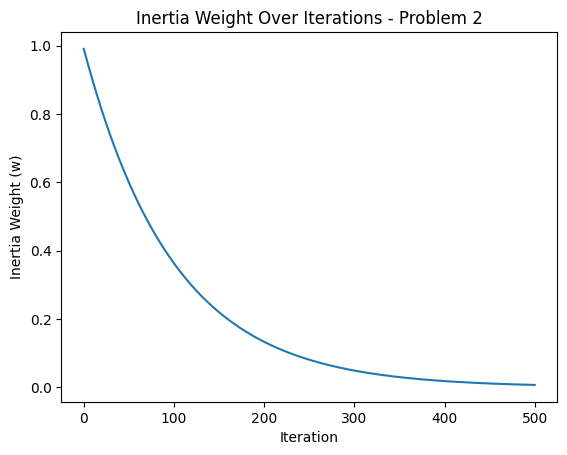

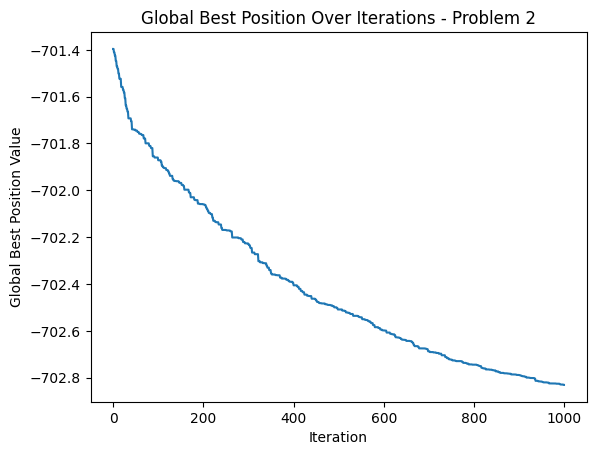




Problem 3 Best Cost: [ 3.49344134e+10  2.66567237e+10  2.14038620e+10  1.81831370e+10
  1.29183275e+10  1.15263751e+10  9.56130952e+09  9.11209303e+09
  8.04278863e+09  5.32770025e+09  3.73766893e+09  3.73766893e+09
  3.62665654e+09  2.57781690e+09  2.21154580e+09  1.73671415e+09
  1.73671415e+09  1.72863821e+09  1.38922683e+09  1.26321757e+09
  1.19020332e+09  8.89809370e+08  8.61449200e+08  6.74350401e+08
  6.11235098e+08  5.26820547e+08  5.26820547e+08  4.95033215e+08
  3.86289764e+08  3.86289764e+08  3.86289764e+08  3.41610251e+08
  3.08776446e+08  2.92672813e+08  2.92268045e+08  2.87512155e+08
  2.29733873e+08  2.16514756e+08  2.16514756e+08  2.12283762e+08
  2.12283762e+08  1.82945877e+08  1.39993916e+08  1.08521648e+08
  1.08521648e+08  1.03909677e+08  8.58199067e+07  8.58199067e+07
  8.55577901e+07  8.55577901e+07  8.55577901e+07  7.41970051e+07
  7.36038391e+07  7.36038391e+07  7.18468845e+07  7.18468845e+07
  6.23307979e+07  5.96799378e+07  4.65324714e+07  4.65324714e+07
 

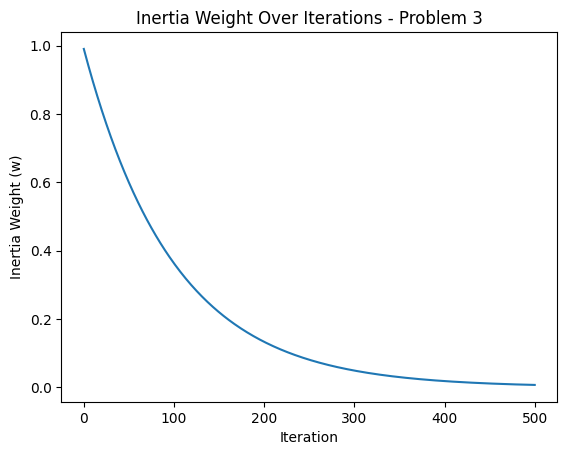

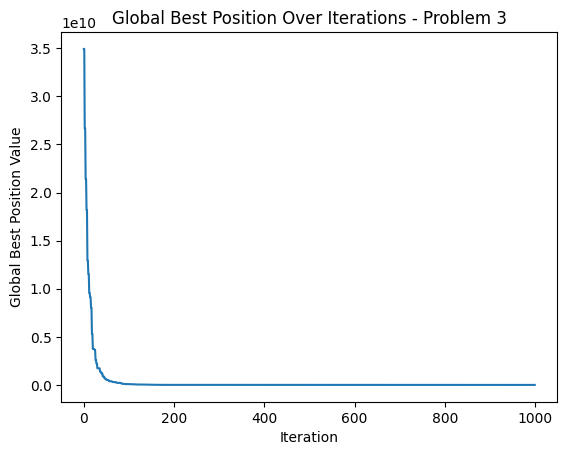




Problem 4 Best Cost: [ 3.87156903e+05  2.94920392e+05  2.69486492e+05  2.00042693e+05
  1.58470755e+05  1.05675161e+05  7.96558568e+04  6.72762199e+04
  6.67314423e+04  5.04741722e+04  3.61400583e+04  2.77679059e+04
  2.29208138e+04  2.29208138e+04  2.00962359e+04  1.50375603e+04
  1.30870396e+04  9.45339190e+03  8.01225862e+03  7.34758053e+03
  7.25224225e+03  7.25224225e+03  6.89204467e+03  6.89204467e+03
  4.92132580e+03  4.66877004e+03  4.44361981e+03  3.88998155e+03
  3.55425281e+03  3.53761887e+03  3.34387904e+03  3.34387904e+03
  2.32963024e+03  2.32963024e+03  2.32065437e+03  1.85159833e+03
  1.85159833e+03  1.85159833e+03  1.85159833e+03  1.69928225e+03
  1.40609611e+03  1.40609611e+03  1.39287556e+03  1.39287556e+03
  1.12869483e+03  1.12869483e+03  1.12869483e+03  1.12869483e+03
  6.77094496e+02  6.77094496e+02  4.34723559e+02  3.51740463e+02
  3.51740463e+02  2.74209492e+02  2.74209492e+02  2.53312288e+02
  1.57894289e+02  6.03523298e+01  6.03523298e+01  6.03523298e+01
 

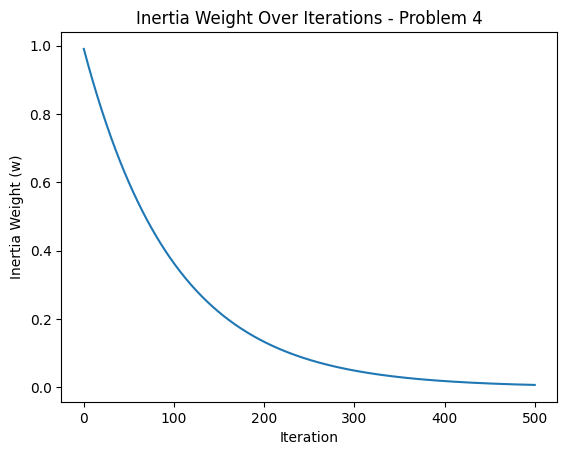

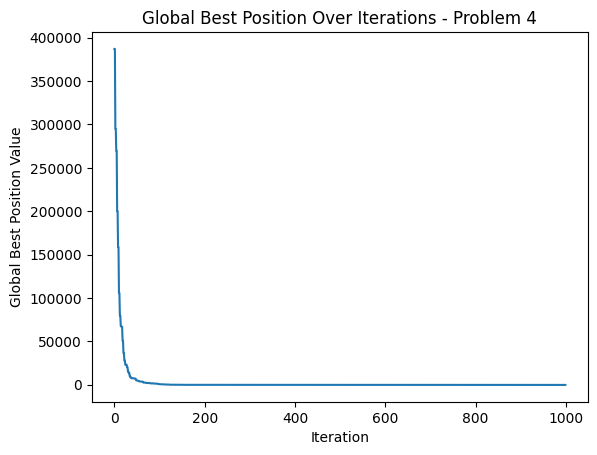




Problem 5 Best Cost: [-334.16512533 -334.20529351 -334.24841613 -334.29207702 -334.35682721
 -334.41583484 -334.43974813 -334.44287112 -334.45550627 -334.49770531
 -334.52993408 -334.55493849 -334.59706306 -334.67671831 -334.67671831
 -334.71700603 -334.71700603 -334.71700603 -334.76766747 -334.76766747
 -334.79953747 -334.79953747 -334.79953747 -334.79953747 -334.81281899
 -334.83941938 -334.83941938 -334.83941938 -334.85482987 -334.85755464
 -334.88254087 -334.88254087 -334.89480258 -334.89596632 -334.89596632
 -334.89596632 -334.89596632 -334.908504   -334.91638512 -334.91638512
 -334.9183988  -334.9183988  -334.93231097 -334.9528652  -334.97112696
 -334.97492621 -335.00215088 -335.00215088 -335.00215088 -335.00215088
 -335.02053006 -335.02060006 -335.07414785 -335.07414785 -335.07414785
 -335.07630425 -335.08497862 -335.08497862 -335.08497862 -335.08497862
 -335.11068699 -335.11068699 -335.11068699 -335.11068699 -335.16566276
 -335.17890705 -335.17890705 -335.17890705 -335.17890

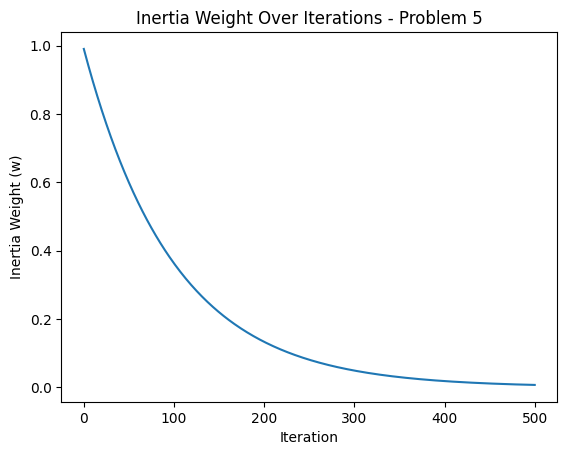

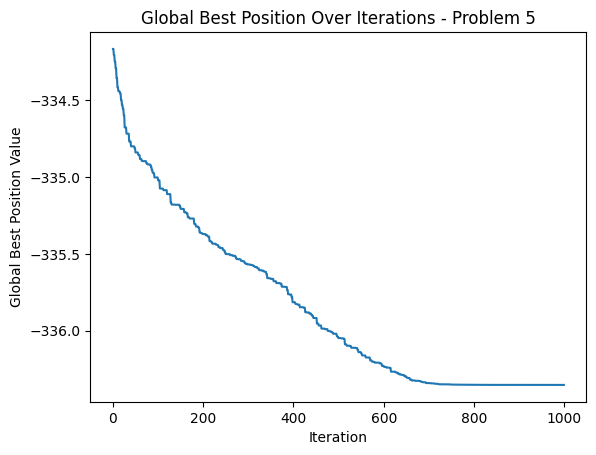




Problem 6 Best Cost: [-183.53392427 -183.56922736 -183.60260347 -183.67160629 -183.74273347
 -183.81173361 -183.84736621 -183.86066084 -183.87234691 -183.90155788
 -183.93772782 -183.93934589 -183.99198538 -184.01953564 -184.01953564
 -184.04263338 -184.05212334 -184.05212334 -184.08434143 -184.08434143
 -184.11630859 -184.11630859 -184.12697974 -184.15134002 -184.15134002
 -184.16684161 -184.16684161 -184.16684161 -184.17160639 -184.18908709
 -184.19035709 -184.19035709 -184.20274274 -184.20731377 -184.2193822
 -184.2193822  -184.24789647 -184.26346574 -184.26346574 -184.28356376
 -184.29070466 -184.29070466 -184.30618271 -184.30618271 -184.30618271
 -184.3145967  -184.31798041 -184.34994918 -184.34994918 -184.3640753
 -184.3640753  -184.37312632 -184.37312632 -184.37312632 -184.37376832
 -184.37376832 -184.37802703 -184.38118617 -184.38118617 -184.38118617
 -184.38132509 -184.40035757 -184.40035757 -184.40035757 -184.40156126
 -184.40377252 -184.42385065 -184.43684636 -184.4402536

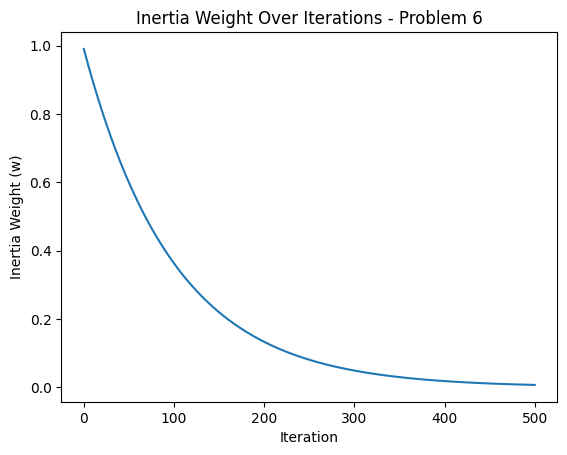

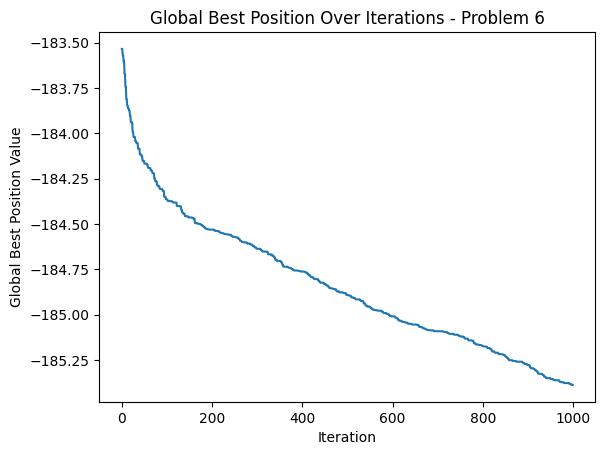




Problem 7 Best Cost: [62805.10333687 52024.98638523 50918.49160474 46450.8310533
 41515.62894862 41515.62894862 41515.62894862 41515.62894862
 41515.62894862 40855.01044236 40013.82321727 38944.18908352
 38944.18908352 38944.18908352 38944.18908352 38775.78943785
 38775.78943785 36425.52016218 36425.52016218 36425.52016218
 36425.52016218 36409.63785913 36409.63785913 34743.42530321
 34680.16019466 34357.64351102 34357.64351102 34357.64351102
 33965.80336886 33650.67254368 33650.67254368 33349.66773855
 33257.35262974 33257.35262974 33257.35262974 33257.35262974
 32799.75491946 32549.95957521 31786.06592322 31786.06592322
 31786.06592322 31107.45526175 30876.18883196 30876.18883196
 30704.09256148 30520.76767516 30520.76767516 30520.76767516
 30520.76767516 30520.76767516 30520.76767516 30514.35910264
 30179.75819129 29879.34399672 29879.34399672 28787.61111378
 28530.62036681 28530.62036681 28530.62036681 28530.62036681
 27985.51377525 27985.51377525 26832.06793762 26832.06793762
 

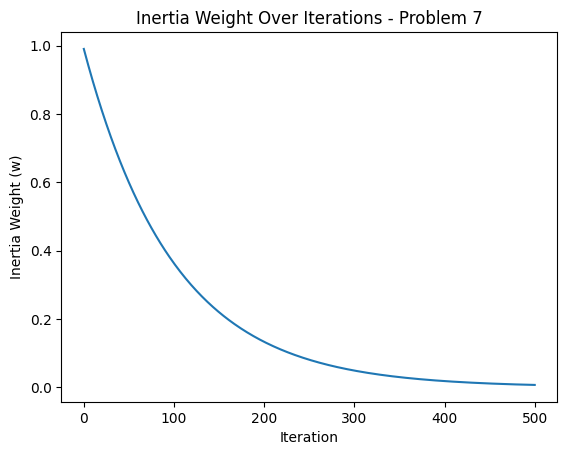

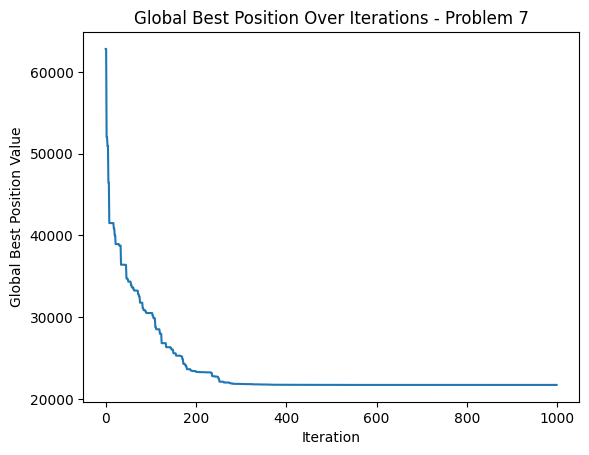




Problem 8 Best Cost: [42926.54560982 33224.1199959  33224.1199959  31398.43970798
 31398.43970798 31398.43970798 25884.49521636 19783.60165293
 15820.72439001  8955.89987794  8955.89987794  6525.34482861
  6525.34482861  6525.34482861  6525.34482861  4797.08353174
  4797.08353174  4797.08353174  4797.08353174  3077.83707641
  2546.67344891  2528.33505086  2528.33505086  2494.35313911
  2043.50647425  2043.50647425  2043.50647425  2043.50647425
  1781.70033655  1781.70033655  1781.70033655  1661.80115341
  1661.80115341   912.1384157    912.1384157    498.53907257
   498.53907257   498.53907257   498.53907257   498.53907257
   498.53907257   498.53907257   346.60846124   346.60846124
   346.60846124   346.60846124   346.60846124   337.66162317
   337.66162317   337.66162317   337.66162317   337.66162317
   321.85153075   321.85153075  -118.91616146  -118.91616146
  -118.91616146  -118.91616146  -118.91616146  -118.91616146
  -140.0394729   -140.0394729   -140.0394729   -140.0394729
 

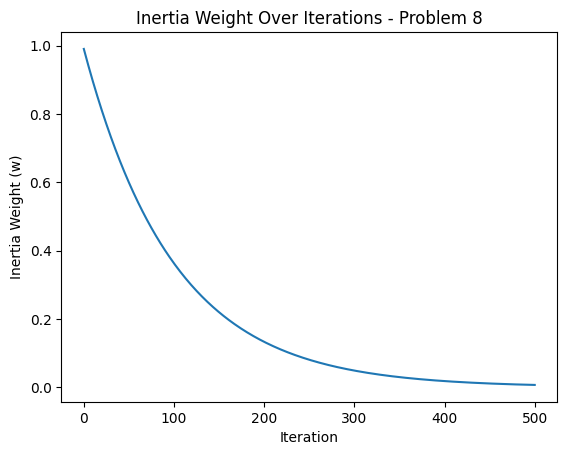

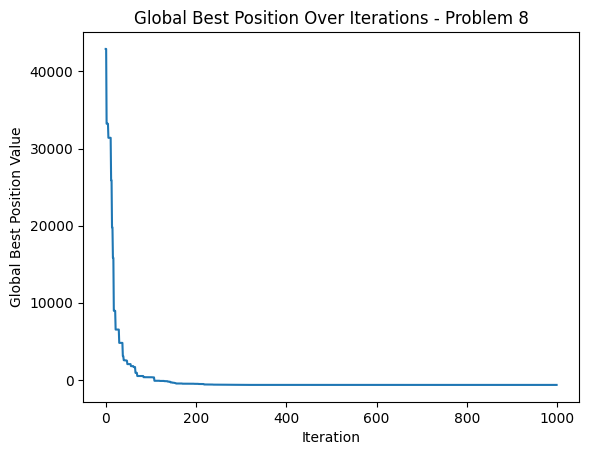




Problem 9 Best Cost: [224215.28520168 105235.49164415  84954.34690281  84954.34690281
  84954.34690281  84954.34690281  84954.34690281  81964.2620521
  77816.6215028   77816.6215028   77816.6215028   77816.6215028
  77816.6215028   77816.6215028   77816.6215028   64544.63707995
  64544.63707995  64544.63707995  64544.63707995  64544.63707995
  64544.63707995  56094.70077727  24067.32142761  24067.32142761
  24067.32142761  24067.32142761  24067.32142761  24067.32142761
  24067.32142761  24067.32142761  24067.32142761  24067.32142761
  24067.32142761  24067.32142761  24067.32142761  24067.32142761
  24067.32142761  23522.84926031  20071.49810277  20071.49810277
  20071.49810277  20071.49810277  20071.49810277  20071.49810277
  20071.49810277  20071.49810277  20071.49810277  20071.49810277
  20071.49810277  20071.49810277  20071.49810277  20071.49810277
  18268.98040735  17381.51882415  17381.51882415  17381.51882415
  16317.0641605   14518.22158921   8349.30765472   8349.30765472
   

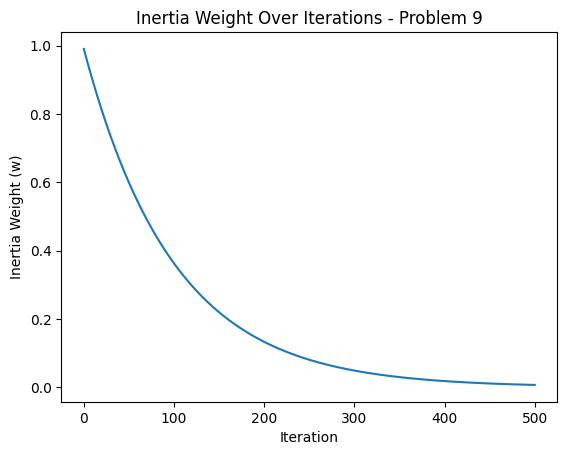

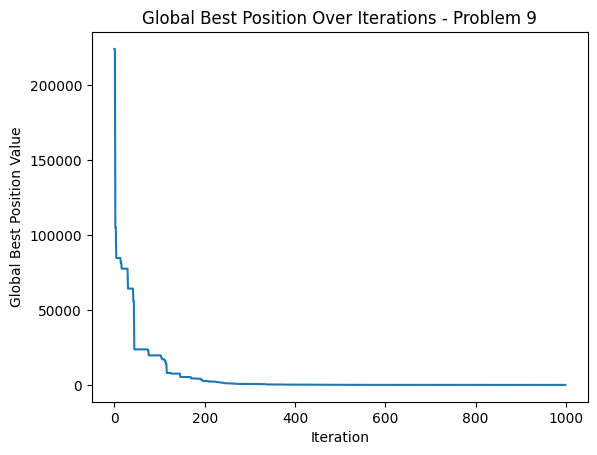




Problem 10 Best Cost: [31414.86491503 31414.86491503 31414.86491503 31414.86491503
 31414.86491503 31414.86491503 31414.86491503 30867.25746024
 28658.55818794 28658.55818794 26925.85868077 24970.3889445
 24970.3889445  24970.3889445  24970.3889445  24826.08723204
 23076.80924556 23076.80924556 23076.80924556 23076.80924556
 23076.80924556 21713.71410454 21713.71410454 20707.18631571
 20707.18631571 20707.18631571 20707.18631571 20082.51488679
 19612.45821073 19612.45821073 19612.45821073 19415.26054085
 19415.26054085 18874.9026873  18874.9026873  18874.9026873
 17335.07019847 17335.07019847 17335.07019847 17335.07019847
 17013.6019563  17013.6019563  15427.39590224 14911.55119157
 14911.55119157 14911.55119157 14911.55119157 13931.34455513
 13931.34455513 12079.24795472 12079.24795472 12079.24795472
 12079.24795472 11749.28882334 11749.28882334 11681.99796426
 11658.2176291  11658.2176291  11492.43784653 11492.43784653
 11492.43784653 11437.56916905 11437.56916905 11340.33319366
 

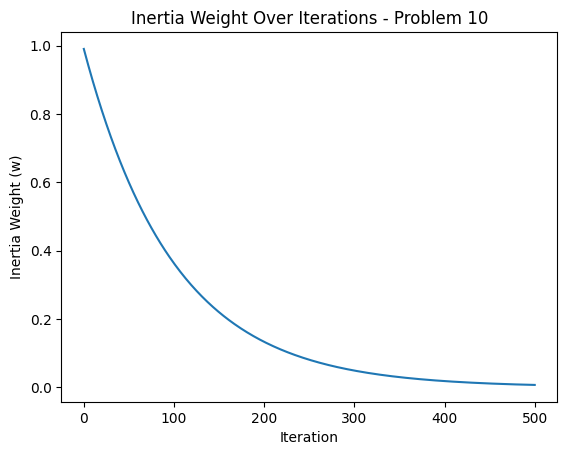

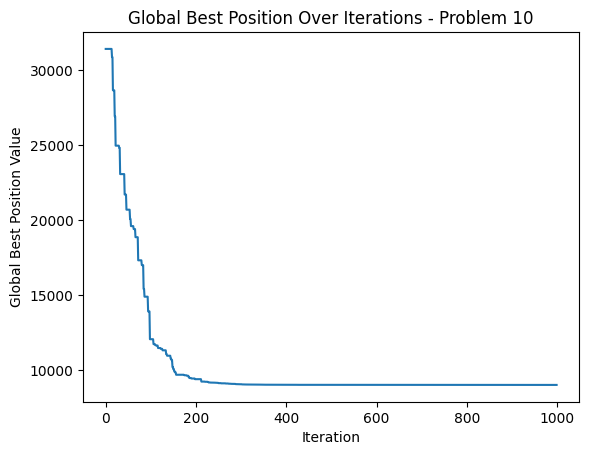




Problem 11 Best Cost: [52354.35786403 50055.82951468 45944.77747587 41571.34881746
 32873.32867633 29152.16396866 29152.16396866 29152.16396866
 29152.16396866 29152.16396866 27090.76461676 23694.47205101
 18621.72747651 18621.72747651 18621.72747651 18621.72747651
 15525.88256789 12935.7637058  12855.35500853 12081.01947157
 11137.46196391 11137.46196391 11137.46196391 11137.46196391
 11137.46196391 11137.46196391 10757.88265952  8768.9109295
  8768.9109295   7309.76105881  6673.22846374  6673.22846374
  6673.22846374  6673.22846374  5879.37899446  5879.37899446
  5879.37899446  5879.37899446  5879.37899446  5879.37899446
  5879.37899446  5682.60435751  4636.65486928  4636.65486928
  4636.65486928  4636.65486928  4636.65486928  4636.65486928
  4556.94200604  4556.94200604  4556.94200604  4556.94200604
  4556.94200604  4189.17680435  4189.17680435  4189.17680435
  4189.17680435  4189.17680435  4189.17680435  4189.17680435
  4189.17680435  4101.59633573  3816.30282016  3816.30282016


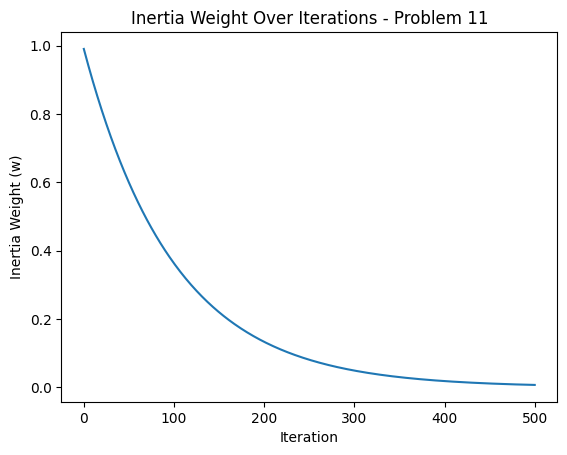

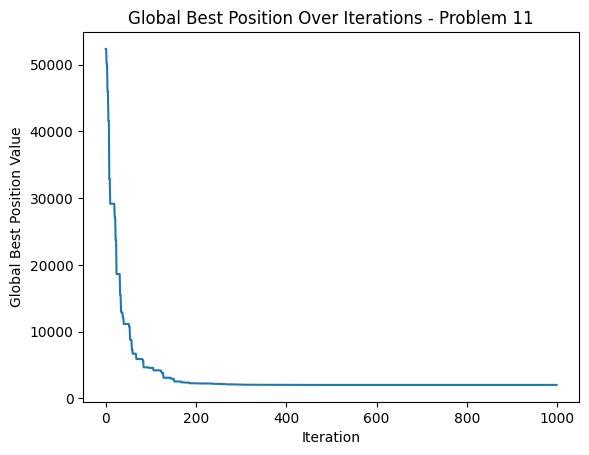




Problem 12 Best Cost: [52905.49613961 43243.31022979 43243.31022979 43243.31022979
 43243.31022979 38004.51830993 38004.51830993 38004.51830993
 38004.51830993 34612.65924651 29017.61278368 29017.61278368
 28992.89805136 28032.9989987  26451.1015858  26451.1015858
 26451.1015858  26451.1015858  24309.21969171 19508.76333252
 19508.76333252 19508.76333252 19508.76333252 18329.11563672
 17753.47700232 17445.68980597 17445.68980597 17445.68980597
 17262.29698651 16820.82549007 16820.82549007 16820.82549007
 14233.08862774 14233.08862774 14233.08862774 13331.35390328
 13331.35390328 13331.35390328 13331.35390328 13331.35390328
 13331.35390328 13331.35390328 13331.35390328 12827.76777314
 12279.76302088 12279.76302088 12162.01770821 12162.01770821
 12155.03148209 11835.07418814 11563.12028464 10819.23068633
 10819.23068633 10819.23068633 10819.23068633 10819.23068633
 10819.23068633 10819.23068633 10819.23068633 10670.36547562
 10670.36547562 10670.36547562 10613.82218026 10613.82218026


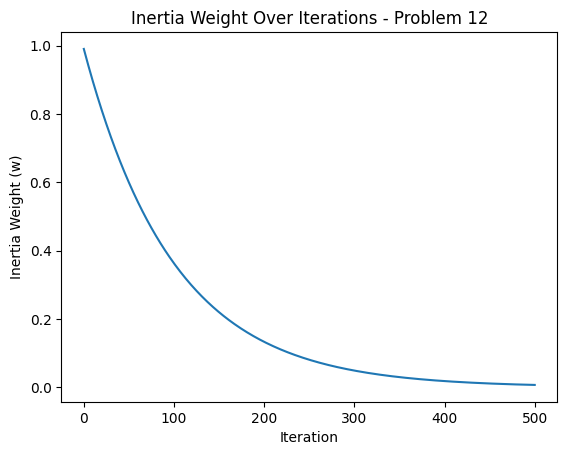

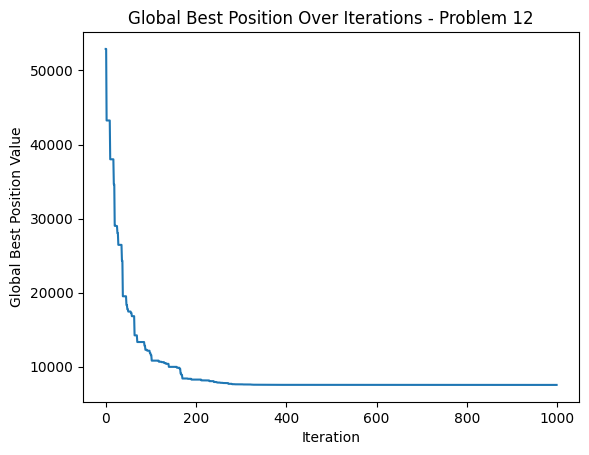




Problem 13 Best Cost: [145433.30695096 145433.30695096 145433.30695096 145433.30695096
 145433.30695096  75859.37993269  75859.37993269  75859.37993269
  71428.40322673  71428.40322673  71428.40322673  71428.40322673
  71428.40322673  71428.40322673  71428.40322673  71428.40322673
  71428.40322673  71428.40322673  71428.40322673  71428.40322673
  60526.02165865  60526.02165865  60526.02165865  60526.02165865
  60526.02165865  60526.02165865  60526.02165865  60526.02165865
  60526.02165865  60526.02165865  35425.61461363  35425.61461363
  35425.61461363  35425.61461363  35425.61461363  35425.61461363
  35425.61461363  35425.61461363  35425.61461363  35425.61461363
  35425.61461363  35425.61461363  35425.61461363  35425.61461363
  35425.61461363  35425.61461363  35425.61461363  35425.61461363
  35425.61461363  35425.61461363  35425.61461363  35425.61461363
  35425.61461363  35425.61461363  35425.61461363  35425.61461363
  35425.61461363  35425.61461363  35425.61461363  35425.61461363


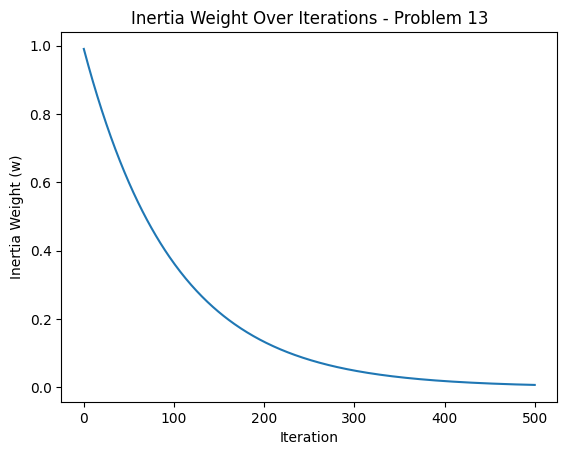

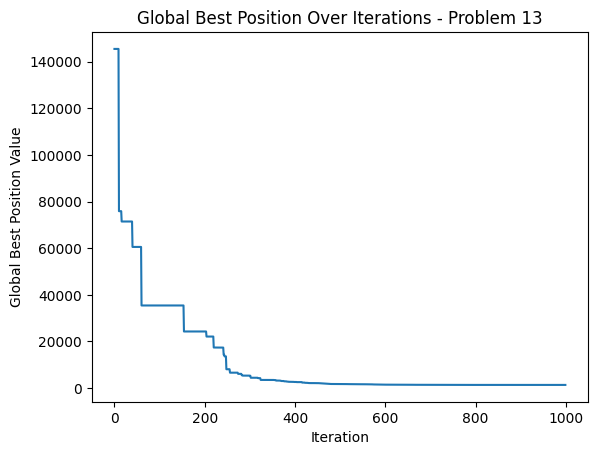




Problem 14 Best Cost: [26254.37514315 25311.0706737  22835.60824129 22835.60824129
 22835.60824129 22835.60824129 22835.60824129 22835.60824129
 22835.60824129 22835.60824129 22835.60824129 22835.60824129
 22835.60824129 22835.60824129 22835.60824129 22835.60824129
 22822.74573159 22822.74573159 22637.5406112  22637.5406112
 22637.5406112  22623.02297566 22623.02297566 22623.02297566
 22623.02297566 22623.02297566 22623.02297566 22445.90129747
 22445.90129747 22445.90129747 22445.90129747 22445.90129747
 22445.90129747 22445.90129747 22415.82124446 22415.82124446
 22127.34399227 21870.19044079 21870.19044079 21830.34435829
 21830.34435829 21830.34435829 21409.09767396 21409.09767396
 21409.09767396 21342.13323675 21239.17782664 21176.94698204
 21176.94698204 21176.94698204 21163.70366654 21163.70366654
 21163.70366654 21163.70366654 21163.70366654 21096.98754252
 21033.52317207 21033.52317207 21033.52317207 21033.52317207
 21033.52317207 21033.52317207 21033.52317207 20845.29244247


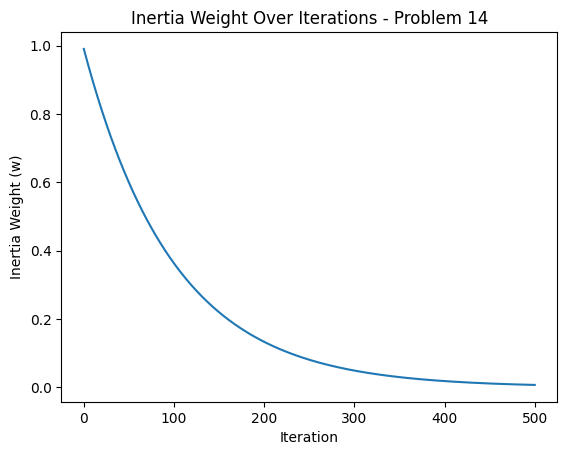

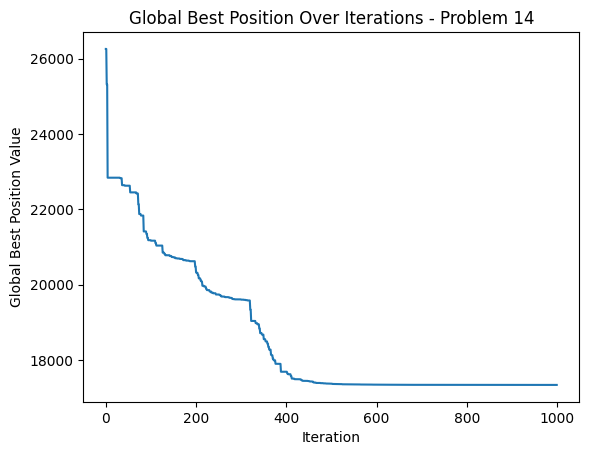




Problem 15 Best Cost: [-226.14045579 -226.14045579 -226.14045579 -226.20506282 -226.20506282
 -226.20506282 -226.41238466 -227.0539587  -227.0539587  -227.0539587
 -227.0539587  -227.0539587  -227.0539587  -227.0539587  -227.0539587
 -227.0539587  -227.0539587  -227.0539587  -227.0539587  -227.27641953
 -227.46316437 -227.46316437 -227.46316437 -227.46316437 -227.46316437
 -227.8050515  -227.93209117 -227.93209117 -227.93209117 -227.93209117
 -227.93209117 -227.93209117 -228.07099218 -228.07099218 -228.07099218
 -228.07099218 -228.07252422 -228.12194685 -228.12733508 -228.15103587
 -228.15103587 -228.15103587 -228.15454445 -228.15454445 -228.17601386
 -228.18250335 -228.18250335 -228.18250335 -228.18523125 -228.19526867
 -228.27095611 -228.27095611 -228.27095611 -228.27095611 -228.27095611
 -228.27095611 -228.27274945 -228.27274945 -228.27274945 -228.27274945
 -228.29917346 -228.3212763  -228.33064672 -228.33064672 -228.33455956
 -228.33455956 -228.35252812 -228.35252812 -228.352528

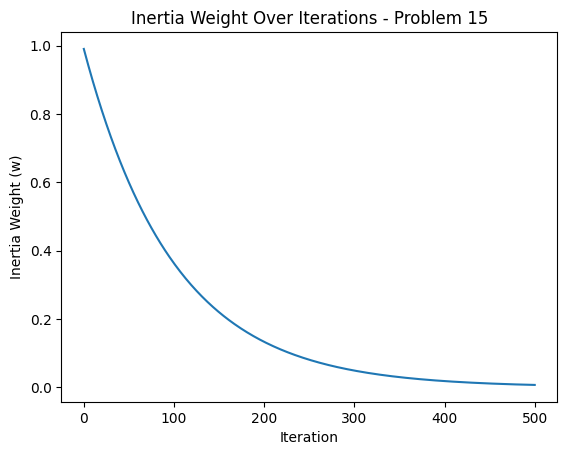

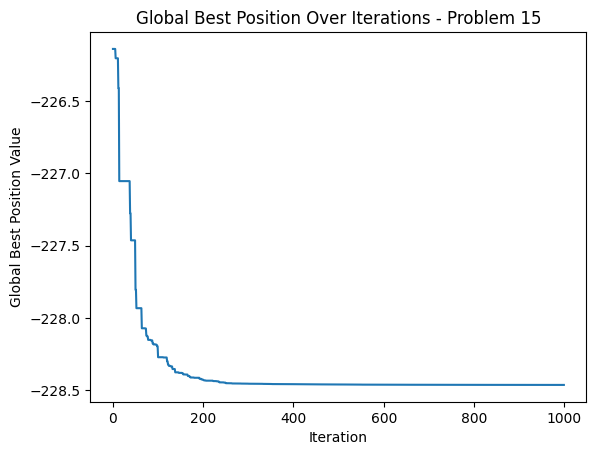




Problem 16 Best Cost: [52469.90355719 40340.04937677 35053.48574715 25039.27336097
 15068.10579531 10328.87258919  7034.80252608  2189.88051783
  1478.84700823   860.44623756   624.49127492 -1161.93319502
 -1338.16091398 -2138.02043469 -2604.32208752 -2604.32208752
 -2737.6879599  -2780.66014375 -3265.2381422  -3265.2381422
 -3265.2381422  -3265.2381422  -3615.7727615  -3845.49353582
 -3849.05347795 -3849.05347795 -3859.35210769 -3859.35210769
 -3910.38027125 -3910.38027125 -3997.79150224 -3998.11370177
 -4070.71251004 -4070.71251004 -4130.12570866 -4130.12570866
 -4130.12570866 -4130.12570866 -4130.12570866 -4151.93443763
 -4202.19931348 -4202.19931348 -4202.19931348 -4217.87272685
 -4217.87272685 -4217.87272685 -4218.49588151 -4228.14274978
 -4262.4814305  -4262.4814305  -4262.4814305  -4262.4814305
 -4262.4814305  -4262.4814305  -4272.3663053  -4272.3663053
 -4272.3663053  -4282.13959279 -4283.4730704  -4283.4730704
 -4288.06615935 -4288.06615935 -4291.72689324 -4291.72689324
 -4

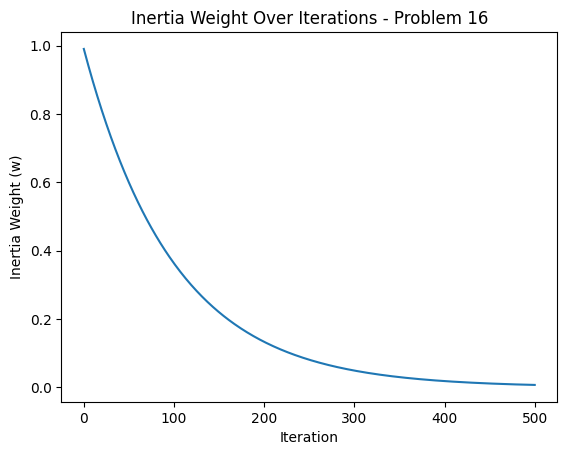

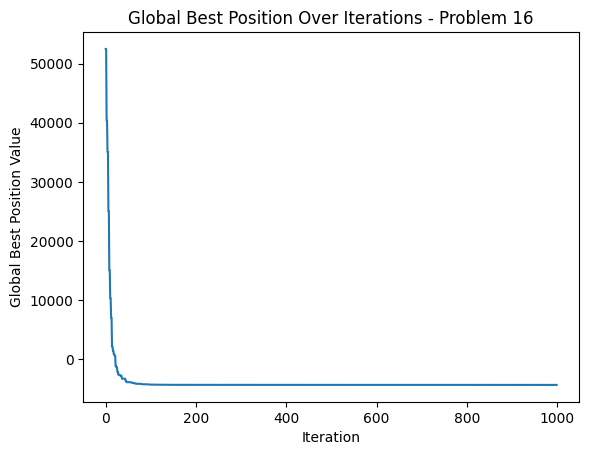




Problem 17 Best Cost: [ 2.94390784e+06  2.59605276e+06  2.07901796e+06  1.95390394e+06
  1.35255020e+06  1.23822739e+06  8.98502008e+05  7.16561249e+05
  7.16561249e+05  5.67230108e+05  4.26603876e+05  3.52220277e+05
  3.42082830e+05  2.47580387e+05  1.56346395e+05  1.56346395e+05
  1.23941643e+05  8.40420750e+04  8.28649889e+04  6.08754358e+04
  6.08754358e+04  4.85381278e+04  4.85381278e+04  4.54025678e+04
  4.39156925e+04  3.20771146e+04  3.20771146e+04  3.20771146e+04
  2.76478841e+04  1.96844978e+04  1.96844978e+04  1.96844978e+04
  1.96844978e+04  1.35264945e+04  1.35264945e+04  1.07824275e+04
  1.07824275e+04  8.77558163e+03  8.15369646e+03  8.09331025e+03
  7.88876462e+03  7.67697912e+03  7.67697912e+03  7.67697912e+03
  7.67697912e+03  6.44663674e+03  6.44663674e+03  6.05236588e+03
  6.05236588e+03  6.05236588e+03  4.79740504e+03  4.79740504e+03
  4.11690316e+03  4.11690316e+03  3.95579456e+03  3.24073789e+03
  2.47715409e+03  2.36834124e+03  1.95634442e+03  1.95634442e+03


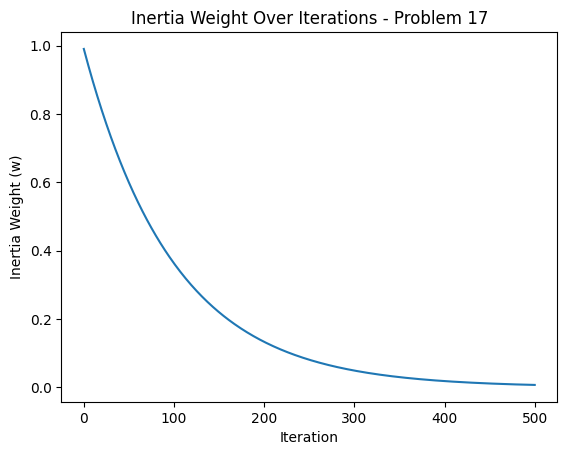

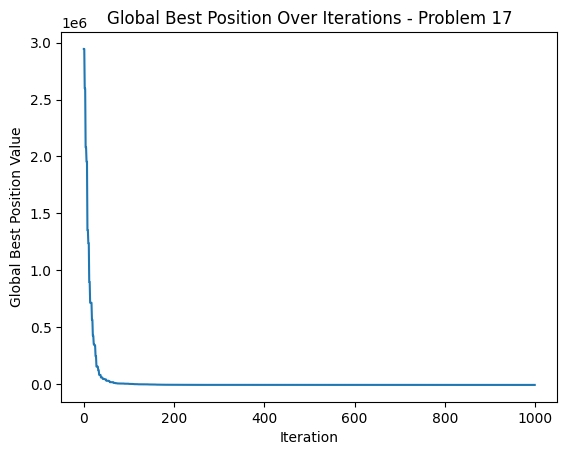




Problem 18 Best Cost: [47725.31323923 38123.16430843 38123.16430843 37812.27380664
 36117.49737985 35662.08323136 35662.08323136 31824.18216323
 31824.18216323 31824.18216323 31824.18216323 29362.17000115
 29362.17000115 29362.17000115 29362.17000115 27897.03416614
 27897.03416614 27897.03416614 27897.03416614 27897.03416614
 27897.03416614 26823.99645733 26823.99645733 26823.99645733
 26823.99645733 26822.02153325 26822.02153325 26822.02153325
 26822.02153325 26822.02153325 26448.57374578 26185.26782589
 25658.59531426 25198.77853388 25114.16815842 24902.97153009
 24807.56539358 24456.76929883 24456.76929883 24456.76929883
 24211.98204473 24031.08303912 23897.03837836 23897.03837836
 23602.56480573 23462.03205396 22964.26339294 22635.62381051
 22635.62381051 22635.62381051 22635.62381051 22635.62381051
 22565.5086746  22539.90599908 22413.32180877 22413.32180877
 22413.32180877 22413.32180877 22328.00673866 22328.00673866
 22251.60996951 22094.52770057 22058.24722043 22058.24722043

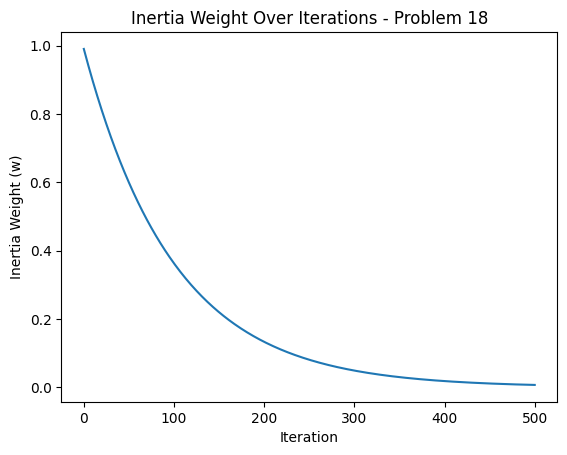

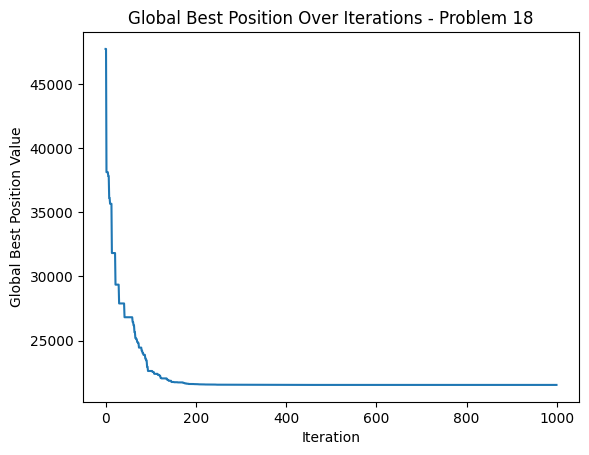




Problem 19 Best Cost: [44419.05444498 35237.08261374 35237.08261374 35237.08261374
 35237.08261374 35237.08261374 35237.08261374 35237.08261374
 35237.08261374 35237.08261374 35237.08261374 35237.08261374
 34857.33673441 34857.33673441 34857.33673441 34711.17978668
 34711.17978668 34711.17978668 34711.17978668 27127.64458507
 27127.64458507 27127.64458507 27127.64458507 27127.64458507
 27127.64458507 26045.11985157 26045.11985157 26045.11985157
 26045.11985157 26045.11985157 26045.11985157 26045.11985157
 26045.11985157 26045.11985157 26045.11985157 23533.13140016
 23533.13140016 23533.13140016 23533.13140016 22801.4172955
 22801.4172955  22801.4172955  22801.4172955  22801.4172955
 19301.05843271 19301.05843271 19301.05843271 19301.05843271
 19301.05843271 19301.05843271 19301.05843271 19301.05843271
 19301.05843271 19301.05843271 19301.05843271 19301.05843271
 19301.05843271 19301.05843271 19301.05843271 19301.05843271
 19301.05843271 19301.05843271 19301.05843271 19301.05843271
 

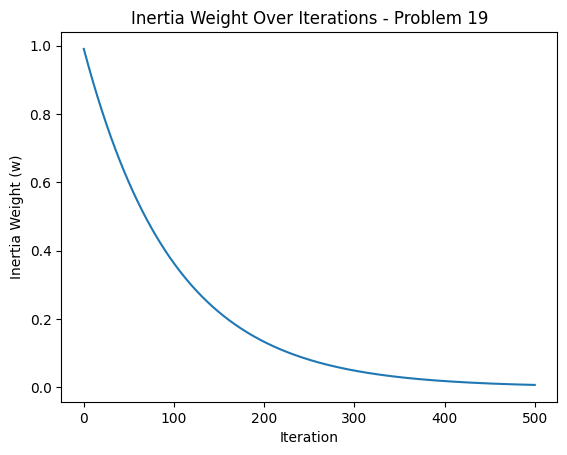

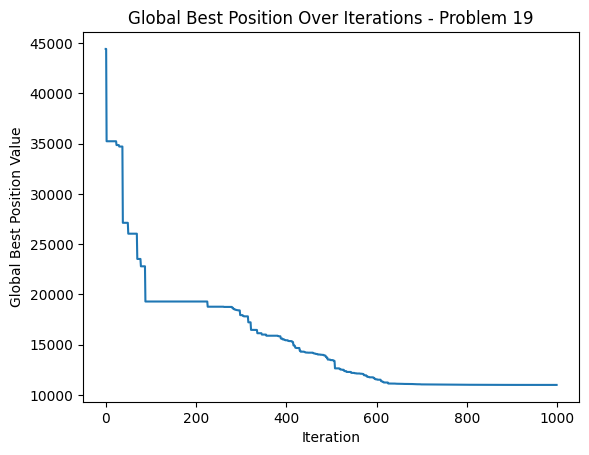




Problem 20 Best Cost: [-84.61348707 -85.70211591 -85.70211591 -85.70211591 -85.70211591
 -86.21878552 -86.26452081 -86.62131904 -86.68992198 -86.68992198
 -86.68992198 -86.68992198 -87.43948147 -87.67201554 -87.67201554
 -87.67201554 -87.67201554 -87.67201554 -87.67201554 -87.67201554
 -87.68921448 -88.04851049 -88.04851049 -88.33030756 -88.33030756
 -88.33030756 -88.61082774 -88.61082774 -88.61082774 -88.61082774
 -88.61082774 -88.61082774 -88.61082774 -88.61082774 -88.61082774
 -88.61082774 -88.64206695 -88.64206695 -88.64206695 -88.64206695
 -88.73558543 -88.81844018 -88.81844018 -88.81844018 -88.86552581
 -88.86552581 -88.86552581 -88.86552581 -88.86552581 -88.86552581
 -88.86552581 -88.86552581 -88.86552581 -88.86552581 -88.86552581
 -88.86552581 -88.86552581 -88.86668283 -88.86668283 -88.86668283
 -88.99168901 -88.99168901 -88.99168901 -89.0027547  -89.0027547
 -89.03775998 -89.03775998 -89.04041887 -89.04041887 -89.04041887
 -89.07190214 -89.07190214 -89.07190214 -89.07190214

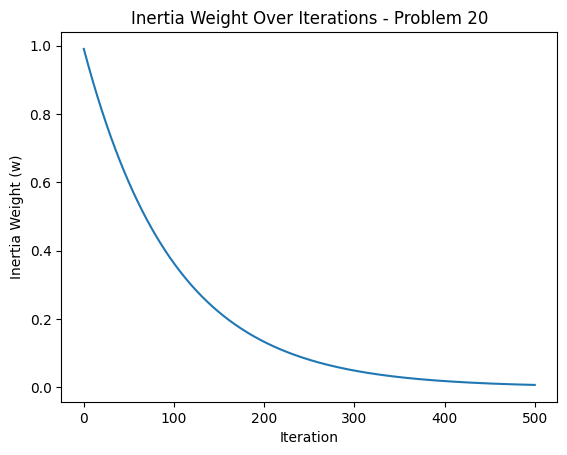

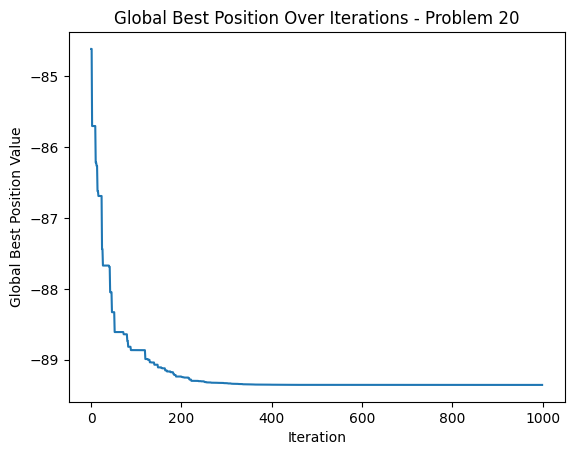




Problem 21 Best Cost: [-41.65227112 -42.76744377 -42.76744377 -42.76744377 -42.76744377
 -42.76744377 -42.76744377 -42.76744377 -42.76744377 -42.76744377
 -42.76744377 -42.76744377 -42.76744377 -42.76744377 -42.76744377
 -42.76744377 -42.76744377 -42.76744377 -42.76744377 -42.86723483
 -42.86986126 -42.86986126 -42.86986126 -42.86986126 -42.86986126
 -42.86986126 -42.86986126 -42.87606805 -42.96069438 -42.96069438
 -42.96069438 -42.96069438 -42.96069438 -42.96069438 -42.99878177
 -43.06560784 -43.06560784 -43.06560784 -43.06560784 -43.06560784
 -43.07252035 -43.07252035 -43.07252035 -43.09438471 -43.22924503
 -43.22924503 -43.22924503 -43.22924503 -43.22924503 -43.22924503
 -43.26917186 -43.26917186 -43.30380111 -43.30380111 -43.30380111
 -43.30380111 -43.31126906 -43.31126906 -43.33209749 -43.33209749
 -43.40106542 -43.40952886 -43.43405646 -43.43405646 -43.43405646
 -43.44788558 -43.45650331 -43.46535094 -43.46535094 -43.46535094
 -43.46920221 -43.47146006 -43.47146006 -43.4714600

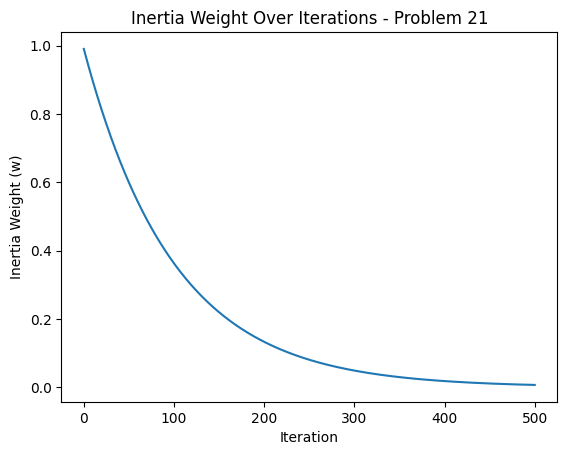

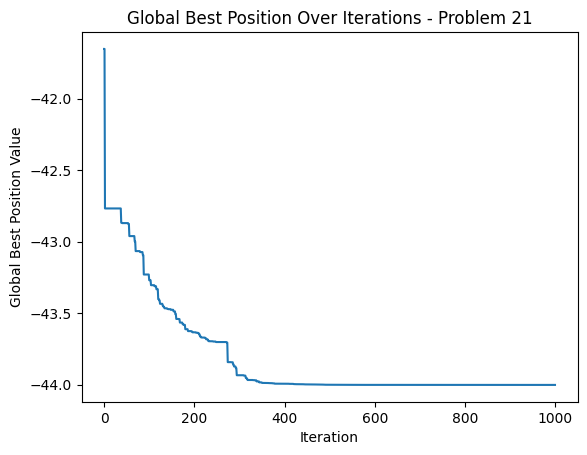




Problem 22 Best Cost: [230346.19734922 220099.57727432 220099.57727432 202576.27444366
 195153.50025394 195153.50025394 195153.50025394 195153.50025394
 193981.29564172 158024.15005363 158024.15005363 158024.15005363
 158024.15005363 158024.15005363 158024.15005363 158024.15005363
 158024.15005363 152651.95854928 152651.95854928 152651.95854928
 150826.25304082 149746.68083016 149746.68083016 149746.68083016
 149746.68083016 149746.68083016 149746.68083016 149746.68083016
 149746.68083016 149746.68083016 149746.68083016 149746.68083016
 149746.68083016 149746.68083016 149746.68083016 149746.68083016
 146477.78104322 146477.78104322 146477.78104322 146477.78104322
 146477.78104322 141017.45792489 138266.13701576 138266.13701576
 138266.13701576 138266.13701576 138266.13701576 138266.13701576
 138266.13701576 138266.13701576 138266.13701576 138266.13701576
 138266.13701576 129952.34469472 129952.34469472 129952.34469472
 129952.34469472 129952.34469472 129952.34469472 129952.34469472


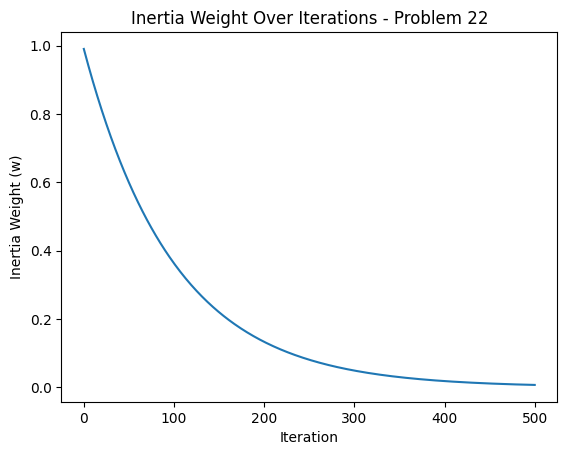

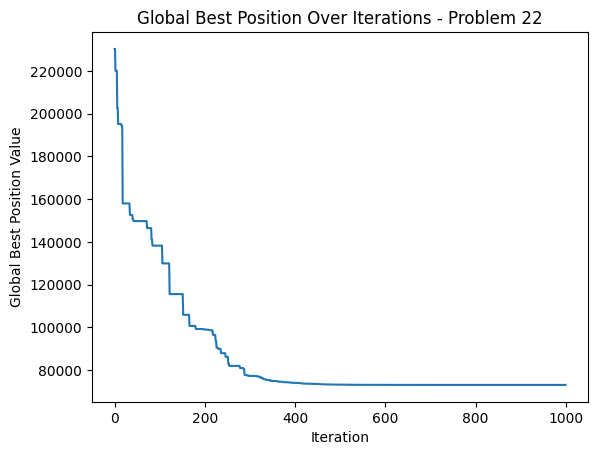




Problem 23 Best Cost: [-23.79546164 -33.01997434 -37.07240261 -37.3703852  -37.3703852
 -37.3703852  -37.3703852  -37.3703852  -43.80540832 -43.80540832
 -44.86109274 -44.86109274 -44.86109274 -45.39426619 -45.39426619
 -45.39426619 -45.39426619 -45.39426619 -45.39426619 -45.39426619
 -45.39426619 -45.39426619 -45.39426619 -45.39426619 -45.39426619
 -47.12259878 -47.50352254 -48.94118012 -48.94118012 -49.42819202
 -49.42819202 -49.70789906 -49.97344575 -49.97344575 -49.97344575
 -50.74963817 -50.74963817 -51.94277996 -51.94277996 -52.06959669
 -52.06959669 -52.18692498 -52.18692498 -52.63765642 -52.63765642
 -52.63765642 -52.63765642 -52.69122521 -52.69122521 -52.69122521
 -52.69122521 -53.85460275 -53.85460275 -53.85460275 -53.85460275
 -53.85460275 -54.388119   -54.64577304 -54.64577304 -54.64577304
 -54.8140346  -54.8140346  -54.8140346  -54.8140346  -54.8520643
 -54.8520643  -54.8520643  -54.93646239 -54.99519528 -54.99519528
 -55.16867541 -55.20139614 -55.20139614 -55.20139614 

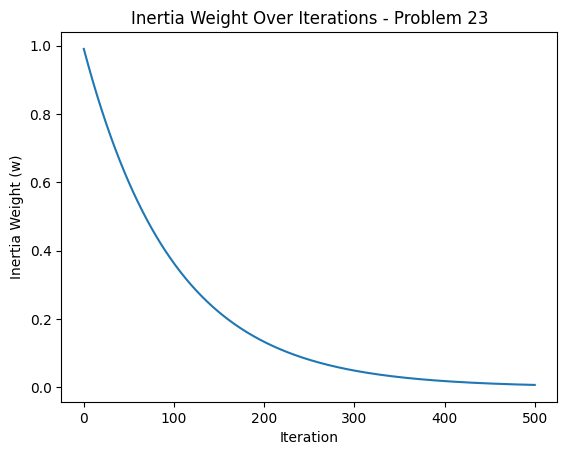

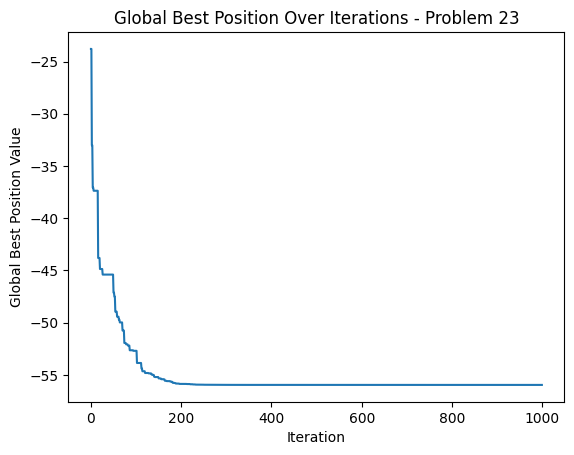




Problem 24 Best Cost: [110.77178642 107.62342933 107.62342933  97.27640591  92.67950162
  92.67950162  80.6186765   80.6186765   80.6186765   80.6186765
  80.6186765   80.6186765   80.6186765   80.6186765   80.6186765
  80.6186765   80.6186765   80.6186765   80.6186765   80.6186765
  80.6186765   80.6186765   80.6186765   80.6186765   80.6186765
  80.6186765   80.6186765   80.6186765   80.6186765   80.14635168
  80.14635168  79.94164198  79.94164198  79.94164198  79.94164198
  79.94164198  79.54784004  78.92404493  78.92404493  78.92404493
  78.66413701  78.66413701  78.66413701  78.66413701  78.53938317
  77.24668964  76.31574288  74.93022599  74.93022599  74.93022599
  74.93022599  74.93022599  74.93022599  74.82436821  73.63933936
  73.63933936  73.50943931  73.50943931  72.32566939  72.32566939
  71.56257861  70.77072985  70.77072985  70.77072985  70.77072985
  70.77072985  70.36025782  70.36025782  69.62769353  69.62769353
  69.11369227  69.11369227  69.01823841  69.01823841  6

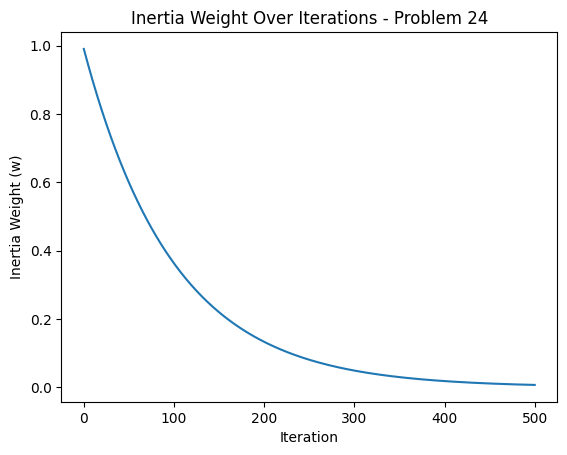

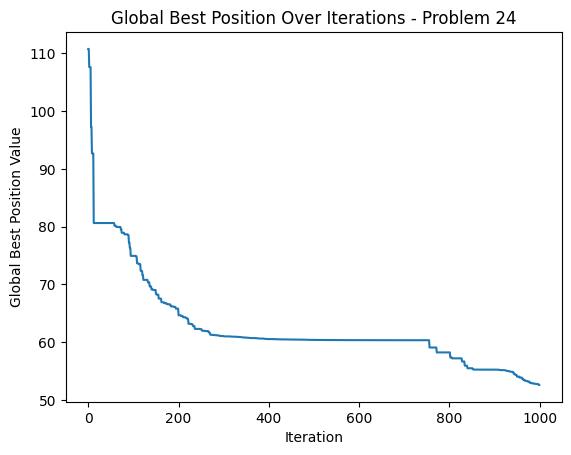

In [24]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [25]:
print('nice')

nice


In [26]:
print('almost complete')

almost complete


In [27]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [28]:
print('ok')

ok


In [29]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [30]:
# print(w_response)